In [1]:
# Combine NIRSpec and MIRI data onto same flux vs wavelength graph

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.time import Time
from astropy.timeseries import TimeSeries, aggregate_downsample
import astropy.units as u


### NIRSpec Data

## path to file with NIRSpec Data
file_nirspec = 'jw03548003001_03101_00001-seg001_nrs1_x1dints.fits'

## use astropy module for reading fits file
hdu_n_NIR = fits.open(file_nirspec)

time_array_NIR = hdu_n_NIR[1].data.field('int_mid_BJD_TDB')

## now let's read the spectra into an array

n_times_NIR = len(time_array_NIR)

n_wpts_NIR = 431 ## I just read this number from the earlier output.

## set up empty arrays for wavelength, flux and flux error:
wNIR = np.zeros((n_wpts_NIR, n_times_NIR))
fNIR = wNIR * 0
feNIR = fNIR * 0

for i in range(0, n_wpts_NIR):
    for j in range(2, n_times_NIR + 2):
        wNIR[i, j - 2] = hdu_n_NIR[j].data[i][0]
        fNIR[i, j - 2] = hdu_n_NIR[j].data[i][1]
        feNIR[i, j - 2] = hdu_n_NIR[j].data[i][2]


wNewUnitNIR = wNIR
fNewUnitNIR = 2.9979E+14 * (fNIR) / (wNIR) ** 2 * 1E-26
feNewUnitNIR = 2.9979E+14 * (feNIR) / (wNIR) ** 2 * 1E-26

In [2]:
# MIRI Data

## path to file with MIRI Data
file_miri = 'miri_lrs_tso_stage3_x1dints_toshare.fits'

## use astropy module for reading fits file
hdu_n_MIRI = fits.open(file_miri)

time_array_MIRI = hdu_n_MIRI[1].data.field('int_mid_BJD_TDB')

## now let's read the spectra into an array
n_times_MIRI = len(time_array_MIRI)

n_wpts_MIRI = 388 ## I just read this number from the earlier output.

## set up empty arrays for wavelength, flux and flux error:
wMIRI = np.zeros((n_wpts_MIRI, n_times_MIRI))
fMIRI = wMIRI * 0
feMIRI = fMIRI * 0

for i in range(0, n_wpts_MIRI):
    for j in range(2, n_times_MIRI + 2):
        wMIRI[i, j - 2] = hdu_n_MIRI[j].data[i][0]
        fMIRI[i, j - 2] = hdu_n_MIRI[j].data[i][1]
        feMIRI[i, j - 2] = hdu_n_MIRI[j].data[i][2]
        
# Convert to units
wNewUnitMIRI = wMIRI
fNewUnitMIRI = 2.9979E+14 * (fMIRI) / (wMIRI) ** 2 * 1E-26
feNewUnitMIRI = 2.9979E+14 * (feMIRI) / (wMIRI) ** 2 * 1E-26  

[[0.55145961 0.55145961 0.55145961 ... 0.55145961 0.55145961 0.55145961]
 [0.55482686 0.55482686 0.55482686 ... 0.55482686 0.55482686 0.55482686]
 [0.55826247 0.55826247 0.55826247 ... 0.55826247 0.55826247 0.55826247]
 ...
 [5.35375357 5.35375357 5.35375357 ... 5.35375357 5.35375357 5.35375357]
 [5.36102962 5.36102962 5.36102962 ... 5.36102962 5.36102962 5.36102962]
 [5.36829376 5.36829376 5.36829376 ... 5.36829376 5.36829376 5.36829376]]
[[13.99568176 13.99568176 13.99568176 ... 13.99568176 13.99568176
  13.99568176]
 [13.98244953 13.98244953 13.98244953 ... 13.98244953 13.98244953
  13.98244953]
 [13.96908569 13.96908569 13.96908569 ... 13.96908569 13.96908569
  13.96908569]
 ...
 [ 4.39117527  4.39117527  4.39117527 ...  4.39117527  4.39117527
   4.39117527]
 [ 4.17508745  4.17508745  4.17508745 ...  4.17508745  4.17508745
   4.17508745]
 [ 3.7119267   3.7119267   3.7119267  ...  3.7119267   3.7119267
   3.7119267 ]]


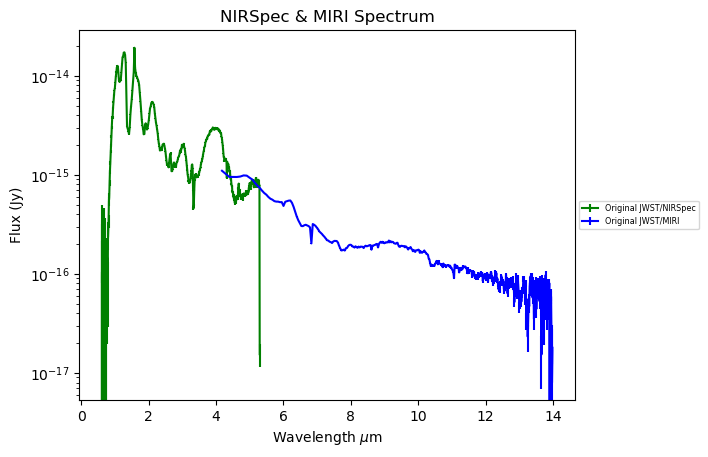

In [3]:
# Plot both


print(wNewUnitNIR)
print(wNewUnitMIRI)

plt.errorbar(wNewUnitNIR[:, 100], fNewUnitNIR[:, 100], feNewUnitNIR[:, 100], label='Original JWST/NIRSpec', color='green')

plt.errorbar(wNewUnitMIRI[:, 100], fNewUnitMIRI[:, 100], feNewUnitMIRI[:, 100], label='Original JWST/MIRI', color='blue')

plt.xlabel('Wavelength $\mu$m')
plt.ylabel('Flux (Jy)')
plt.title('NIRSpec & MIRI Spectrum')
plt.yscale('log')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 'xx-small')
plt.savefig("NIRSpec & MIRI Spectrum")
plt.show()

In [4]:
# Shorten quantities

# NIRSpec

wNewUnitNIR_shortened = wMIRI * 0
fNewUnitNIR_shortened = wMIRI * 0
feNewUnitNIR_shortened = fMIRI * 0

wNewUnitNIR_shortened = wNewUnitNIR[:-9]
print(wNewUnitNIR_shortened.shape)
fNewUnitNIR_shortened = fNewUnitNIR[:-9]
print(fNewUnitNIR_shortened.shape)
feNewUnitNIR_shortened = feNewUnitNIR[:-9]


print(wNewUnitNIR)
print(f"wNewUnit__MIRI_shortened {wNewUnitNIR_shortened}")

print(wNewUnitNIR.shape)
print(fNewUnitNIR.shape)


# MIRI
wNewUnitMIRI_shortened = wMIRI * 0
fNewUnitMIRI_shortened = wMIRI * 0
feNewUnitMIRI_shortened = fMIRI * 0


wNewUnit_MIRI_shortened = wNewUnitMIRI[:-7]
print(wNewUnitMIRI)
print(f"wNewUnit__MIRI_shortened {wNewUnit_MIRI_shortened}")

fNewUnit_MIRI_shortened = fNewUnitMIRI[:-7]
print(wNewUnit_MIRI_shortened.shape)

feNewUnit_MIRI_shortened = feNewUnitMIRI[:-7]
print(fNewUnit_MIRI_shortened.shape)

(422, 5726)
(422, 5726)
[[0.55145961 0.55145961 0.55145961 ... 0.55145961 0.55145961 0.55145961]
 [0.55482686 0.55482686 0.55482686 ... 0.55482686 0.55482686 0.55482686]
 [0.55826247 0.55826247 0.55826247 ... 0.55826247 0.55826247 0.55826247]
 ...
 [5.35375357 5.35375357 5.35375357 ... 5.35375357 5.35375357 5.35375357]
 [5.36102962 5.36102962 5.36102962 ... 5.36102962 5.36102962 5.36102962]
 [5.36829376 5.36829376 5.36829376 ... 5.36829376 5.36829376 5.36829376]]
wNewUnit__MIRI_shortened [[0.55145961 0.55145961 0.55145961 ... 0.55145961 0.55145961 0.55145961]
 [0.55482686 0.55482686 0.55482686 ... 0.55482686 0.55482686 0.55482686]
 [0.55826247 0.55826247 0.55826247 ... 0.55826247 0.55826247 0.55826247]
 ...
 [5.28731298 5.28731298 5.28731298 ... 5.28731298 5.28731298 5.28731298]
 [5.29469061 5.29469061 5.29469061 ... 5.29469061 5.29469061 5.29469061]
 [5.30244923 5.30244923 5.30244923 ... 5.30244923 5.30244923 5.30244923]]
(431, 5726)
(431, 5726)
[[13.99568176 13.99568176 13.99568176 .

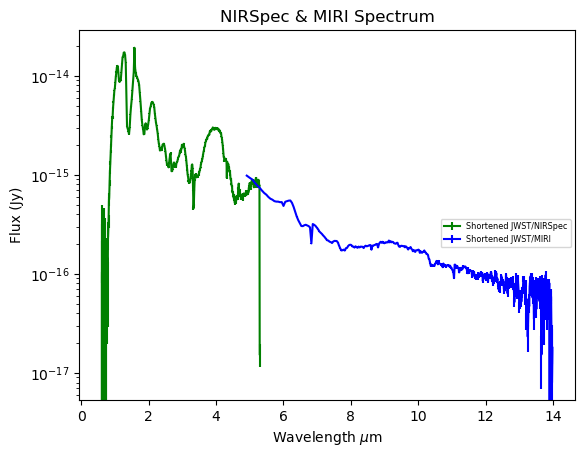

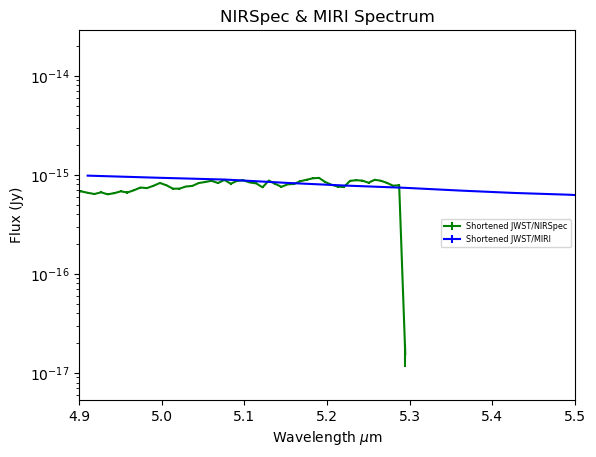

In [5]:
### plot both:

plt.figure()
plt.errorbar(wNewUnitNIR_shortened[:, 100], fNewUnitNIR_shortened[:, 100], feNewUnitNIR_shortened[:, 100], label='Shortened JWST/NIRSpec', color='green')

plt.errorbar(wNewUnit_MIRI_shortened[:, 100], fNewUnit_MIRI_shortened[:, 100], feNewUnit_MIRI_shortened[:, 100], label='Shortened JWST/MIRI', color='blue')


plt.xlabel('Wavelength $\mu$m')
plt.ylabel('Flux (Jy)')
plt.title('NIRSpec & MIRI Spectrum')
plt.yscale('log')
plt.legend(bbox_to_anchor = (1, 0.5), fontsize = 'xx-small')
#plt.savefig("NIRSpec & MIRI Spectrum")



# Plot region between 4.5 to 5.3 microns

plt.figure()

plt.errorbar(wNewUnitNIR_shortened[:, 100], fNewUnitNIR_shortened[:, 100], feNewUnitNIR_shortened[:, 100], label='Shortened JWST/NIRSpec', color='green')

plt.errorbar(wNewUnit_MIRI_shortened[:, 100], fNewUnit_MIRI_shortened[:, 100], feNewUnit_MIRI_shortened[:, 100], label='Shortened JWST/MIRI', color='blue')

plt.xlim(4.9, 5.5)
plt.xlabel('Wavelength $\mu$m')
plt.ylabel('Flux (Jy)')
plt.title('NIRSpec & MIRI Spectrum')
plt.yscale('log')
plt.legend(bbox_to_anchor = (1, 0.5), fontsize = 'xx-small')


plt.show()

In [58]:
# Light curves at shared range of wavelengths (X to Y microns)


## NIRSpec lightcurve

### Define wavelength range
wavelength_min = 5.08  # microns
wavelength_max = 5.28  # microns
J_lc_NIR = np.zeros(len(time_array_NIR)) 


### Extract flux values within the wavelength range
print(fNewUnitNIR_shortened.shape)

for i in range(0,len(time_array_NIR)):
    wavelength_indices_NIR = np.where(np.logical_and(wNewUnitNIR_shortened[:,i] >= wavelength_min, wNewUnitNIR_shortened[:,i] <= wavelength_max))[0]
    flux_within_range_NIR = fNewUnitNIR_shortened[wavelength_indices_NIR,i]
    J_lc_NIR[i] = np.median(flux_within_range_NIR)
    
### normalise the light curve to 1 
norm_NIR = np.median(J_lc_NIR)
J_lc_NIR = J_lc_NIR/ norm_NIR



## NIRSpec binning

# Convert time_array to astropy Time object
time_NIR = Time(time_array_NIR, format='mjd', scale='tdb')

# Create a TimeSeries object
ts_NIR = TimeSeries(time=time_NIR, data={'flux':J_lc_NIR})
print(ts_NIR)

# Define the binning duration in minutes
bin_width = 1  # minute

# Perform binning
binned_lc_NIR = aggregate_downsample(ts_NIR, time_bin_size=bin_width * u.minute, aggregate_func=np.median)

# Extract binned time and flux values
binned_time_NIR = binned_lc_NIR.time_bin_start.mjd
binned_time_NIR_hours = ((binned_time_NIR - 60148.799200587586) * 24) #+ 1.5 # to change unit into hours
binned_flux_NIR = binned_lc_NIR['flux']

(422, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0182529168777996
 60148.79922176977 1.0139409446807992
60148.799242951965 1.0171850521623367
 60148.79926413416 0.9863951571526794
60148.799285316345 0.9982004907546813
 60148.79930649854 1.0307085643766218
 60148.79932768073  0.994061808923173
               ...                ...
 60148.92034154113 0.9969094304132368
 60148.92036272332 1.0089454268798381
 60148.92038390551 0.9879721979018502
 60148.92040508771  1.004916501392399
 60148.92042626989  1.020546855220404
 60148.92044745209 0.9536017383392257
 60148.92046863428 1.0100866599066585
Length = 5726 rows


In [59]:
## MIRI lightcurve

### Define wavelength range
wavelength_min = 5.08  # microns
wavelength_max = 5.28  # microns
J_lc_MIRI = np.zeros(len(time_array_MIRI)) 


### Extract flux values within the wavelength range
print(fNewUnit_MIRI_shortened.shape)

for i in range(0,len(time_array_MIRI)):
    wavelength_indices_MIRI = np.where(np.logical_and(wNewUnit_MIRI_shortened[:,i] >= wavelength_min, wNewUnit_MIRI_shortened[:,i] <= wavelength_max))[0]
    flux_within_range_MIRI = fNewUnit_MIRI_shortened[wavelength_indices_MIRI,i]
    J_lc_MIRI[i] = np.median(flux_within_range_MIRI)
    
### normalise the light curve to 1 
norm_MIRI = np.median(J_lc_MIRI)
J_lc_MIRI = J_lc_MIRI/ norm_MIRI



## NIRSpec binning

# Convert time_array to astropy Time object
time_MIRI = Time(time_array_MIRI, format='mjd', scale='tdb')

# Create a TimeSeries object
ts_MIRI = TimeSeries(time=time_MIRI, data={'flux':J_lc_MIRI})
print(ts_MIRI)

# Define the binning duration in minutes
bin_width = 1  # minute

# Perform binning
binned_lc_MIRI = aggregate_downsample(ts_MIRI, time_bin_size=bin_width * u.minute, aggregate_func=np.median)

# Extract binned time and flux values
binned_time_MIRI = binned_lc_MIRI.time_bin_start.mjd - 60148.94102297342 + (60148.94102297342 - 60148.799200587586)
binned_time_MIRI_hours = binned_time_MIRI * 24  # to change unit into hours
binned_flux_MIRI = binned_lc_MIRI['flux']

(381, 575)
       time               flux       
------------------ ------------------
 60148.94102297342 0.8405705012712967
 60148.94124573055 0.9942380592378542
 60148.94146848769 0.9927971113488183
 60148.94169124483 0.9938039964327277
 60148.94191400197 0.9947795043006887
60148.942136759106 0.9933566272793248
60148.942359516244 0.9917639127727119
               ...                ...
 60149.06754902662 0.9946115125378038
 60149.06777178377 0.9909825323196748
 60149.06799454091 1.0012144236925329
 60149.06821729803 1.0021494773337543
 60149.06844005517 1.0003659145516288
  60149.0686628123  1.003091256723305
 60149.06888556943 1.0015962936303433
Length = 575 rows


There is a time difference of 3.40373726002872 between NIRSpec and MIRI Data respectively
0.9851197815117966
(array([63]),)
1.0499999999301508


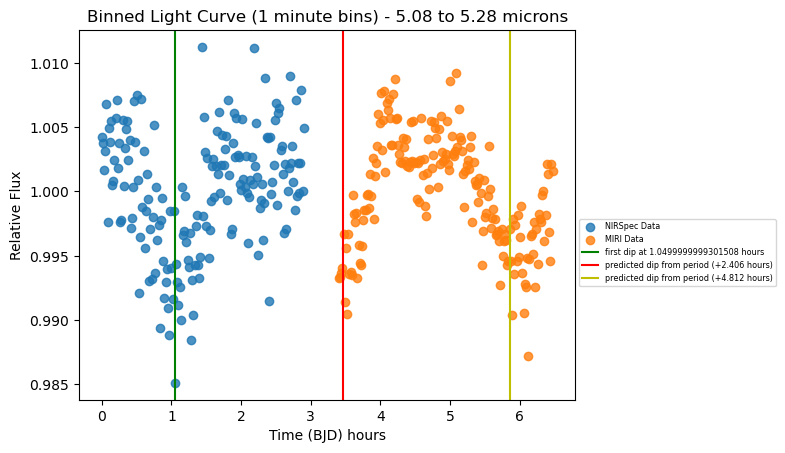

In [84]:
# Plot both NIRSpec & MIRI lightcurves at range between X and Y microns

time_difference = (60148.94102297342 - 60148.799200587586) * 24
print(f"There is a time difference of {time_difference} between NIRSpec and MIRI Data respectively")

# find exact time where first dip happens
print(min(binned_flux_NIR))

flux_array_NIR = np.array(binned_flux_NIR)
index_first_dip = np.where(flux_array_NIR == min(binned_flux_NIR))
print(index_first_dip)  # 63

print(binned_time_NIR_hours[63])



# Plot the binned light curves
plt.scatter(binned_time_NIR_hours, binned_flux_NIR, marker='o', linestyle='-', alpha=0.8, label= 'NIRSpec Data')
plt.scatter(binned_time_MIRI_hours, binned_flux_MIRI, marker='o', linestyle='-', alpha=0.8, label= 'MIRI Data')
plt.xlabel("Time (BJD) hours")
plt.ylabel("Relative Flux")
plt.title(f"Binned Light Curve (1 minute bins) - {wavelength_min} to {wavelength_max} microns")
#plt.savefig("binned_light_curve_1_min_.png")
plt.axvline(x = binned_time_NIR_hours[63], color = 'g', label = f'first dip at {binned_time_NIR_hours[63]} hours')
plt.axvline(x = binned_time_NIR_hours[63] + 2.406, color = 'r', label = 'predicted dip from period (+2.406 hours)')
plt.axvline(x = binned_time_NIR_hours[63] + (2 * 2.406) , color = 'y', label = 'predicted dip from period (+4.812 hours)')
plt.legend(bbox_to_anchor = (1, 0.5), fontsize = 'xx-small')
plt.show()